In [8]:
import cobra
import pandas as pd
from cobra.io import read_sbml_model
from cobra.flux_analysis import phenotype_phase_plane
import matplotlib.pyplot as plt
import optslope

plt.rcParams['font.family'] = "arial"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

model = read_sbml_model("core_model_with_rump_frmA_fdh.xml")

knockouts_example1 = [
    "FBP"
    ]
co_substrates_example1 = [
    "pyr"
    ]
knockouts_example2 = [
    "RPI",
    "EDD"
    ]
co_substrates_example2 = [
    "6pgc"
    ]
knockouts_example3 = [
    "FBP"
    ]
co_substrates_example3 = [
    ]
knockouts_example4 = [
    "RPI",
    "EDD"
    ]
co_substrates_example4 = [
    ]
knockouts_example5 = [
    "GND"
    ]
co_substrates_example5 = [
    "r5p"
    ]
knockouts_example6 = [
    "GND"
    ]
co_substrates_example6 = [
    ]
    
target_reaction = "H6PS"

In [17]:
def main(model, knockouts, carbon_sources, target_reaction, bounds_cosubstrate, bounds_meoh, ax: plt.Axes, color):
    model1 = model.copy()
    model1 = modify_model(model1, knockouts, carbon_sources, bounds_cosubstrate, bounds_meoh)
    plot_production_envelope(model1, target_reaction, ax, color)

def modify_model(model, knockouts, carbon_sources, bounds_cosubstrate, bounds_meoh):
    for ko in knockouts:
        model.reactions.get_by_id(ko).knock_out()
    for carbon_source in carbon_sources:
        model.reactions.get_by_id("EX_" + str(carbon_source) + "_e").bounds = bounds_cosubstrate
    model.reactions.get_by_id("EX_methanol_e").bounds = bounds_meoh
    return model

def plot_production_envelope(model, target_reaction, ax: plt.Axes, color):
    
    label = ""
    
    prod_env_df = phenotype_phase_plane.production_envelope(model, target_reaction, points=500)
    
    ax.plot(prod_env_df[target_reaction],
            prod_env_df.flux_maximum,
            c=color, ls='-', lw=1, label='')
    
    ax.fill_between(
        prod_env_df[target_reaction],
        prod_env_df.flux_minimum,
        prod_env_df.flux_maximum,
        linewidth=0,
        alpha=1,
        facecolor=color,
        label=label)
    
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    
    ax.set_ylabel("growth rate\n[h-1]")
    ax.set_xlabel("methanol uptake [mmol gcdw-1 h-1]")
    
    return ax

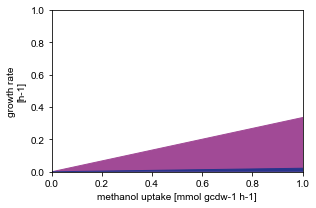

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3))

bounds_cosubstrate = (-10, -10)
bounds_meoh = (-5, 0)

main(model, knockouts_example1, co_substrates_example1, target_reaction, bounds_cosubstrate, bounds_meoh, ax, color = [0.63, 0.29, 0.59])
main(model, knockouts_example3, co_substrates_example3, target_reaction, bounds_cosubstrate, bounds_meoh, ax, color = [0.153, 0.204, 0.545])

plt.tight_layout()

fig.savefig("figure1b.pdf")

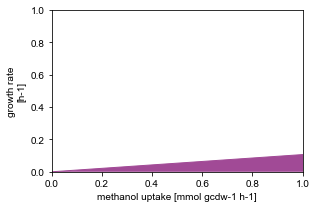

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3))

bounds_cosubstrate = (-10, -10)
bounds_meoh = (-5, 0)

main(model, knockouts_example4, co_substrates_example4, target_reaction, bounds_cosubstrate, bounds_meoh, ax, color = [0.153, 0.204, 0.545])
main(model, knockouts_example2, co_substrates_example2, target_reaction, bounds_cosubstrate, bounds_meoh, ax, color = [0.63, 0.29, 0.59])

plt.tight_layout()

fig.savefig("figure1c.pdf")

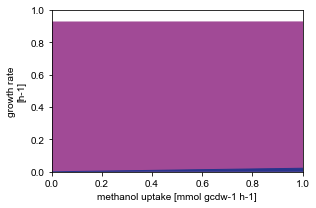

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3))

bounds_cosubstrate = (-10, -10)
bounds_meoh = (-5, 0)

main(model, knockouts_example5, co_substrates_example5, target_reaction, bounds_cosubstrate, bounds_meoh, ax, color = [0.63, 0.29, 0.59])
main(model, knockouts_example6, co_substrates_example6, target_reaction, bounds_cosubstrate, bounds_meoh, ax, color = [0.153, 0.204, 0.545])

plt.tight_layout()

fig.savefig("figure1d.pdf")